In [217]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
pd.options.display.max_columns = None

In [218]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [219]:
#Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))


In [220]:
#Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)


In [221]:
#Merge the patient data frame and 
full_data =pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [222]:
full_data= pd.merge(full_data, train_potentialfraud, on='Provider', how='left')

In [223]:
train_data = pd.read_pickle("train_dataset.pkl")


In [224]:
train_data.drop(['WeeklyClaims', 'MonthlyClaims', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'DeductibleAmtPaid',
                'InscClaimAmtReimbursed'], axis=1, inplace=True)

In [10]:
opPhy = full_data.groupby(['Provider', 'OperatingPhysician'])['OperatingPhysician'].count().reset_index(name='a').\
groupby('Provider')['a'].count().reset_index(name= 'NumDistincOpPhy')


### Market Basket Analysis (Associative Rule Mining)


In [311]:
#Filtering data set with chronic conditions
chronic= full_data.filter(regex='Chronic').replace(to_replace=2, value=0)
chronic.columns = [col.replace('ChronicCond_', '') for col in chronic.columns]


In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [30]:
support = frequent_itemsets.sort_values(by='support')
support2= support.sort_values(by='support').tail(15)

Text(0.5, 1.0, 'Percent of Patient With Chronic Conditions')

<Figure size 1440x1440 with 0 Axes>

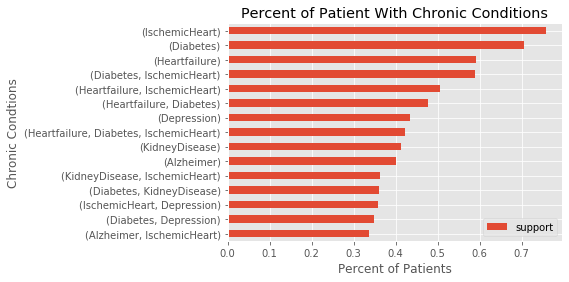

In [31]:
# Plot the frequent items
plt.figure(figsize=(20,20))
support2.plot.barh(y='support', x='itemsets')
plt.ylabel('Chronic Condtions')
plt.xlabel('Percent of Patients')
plt.title('Percent of Patient With Chronic Conditions')

In [193]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.2)
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")


a= rules.sort_values(by='confidence', ascending=False)[:30]


In [194]:
ante = tuple(a['antecedents'])
conse = tuple(a['consequents'])

lab = list(zip(ante, conse))
confi = list(round(a['confidence'], 2))


labels_dict = {}

for i in range(len(a)):
    labels_dict[lab[i]] = confi[i]


##  Use network graph the show the association from mba 

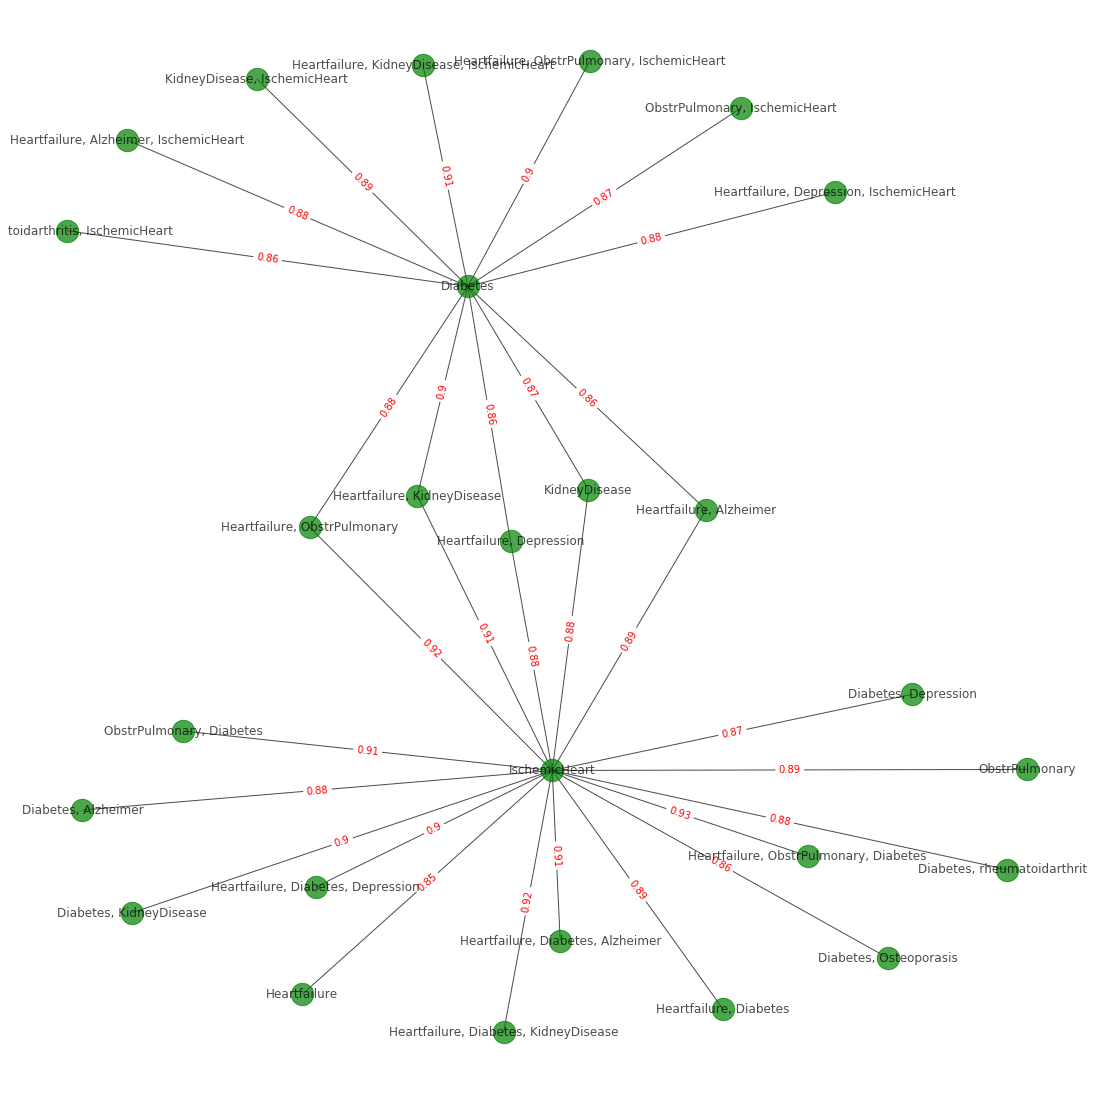

In [215]:
import networkx as nx

a['weight'] = list(zip(a['antecedents'], a['consequents'], a['support']))


edges = [[ante[i], conse[i]] for i in range(len(a))]


tuple(zip(ante, conse))


G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 15))

nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='green',alpha=0.7,\
labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels_dict,font_color='red', font='bold')
plt.axis('off')
plt.show()
    
